In [46]:
from utils import *
import random
from contract_breakdown_utils import *

In [47]:
dates = [i for i in os.listdir('crawled_codes/') if i.startswith('2023') and not i.endswith('_duplicates')]
total_num = 0
for date in dates:
    file_names = os.listdir('crawled_codes/' + date)
    total_num += len(file_names)
print('total num of crawled code files: ', total_num)


failed_111 = []
contract_names = []
for date in dates:
    file_names = os.listdir('crawled_codes/' + date)
    for f in file_names:
#         if f in ['0xf03d6c901ad36e6dae14a1bfd36db1d730914c77.txt', '0xbf7f4cdf6084d57e3bddc2afa2308be72b0ea087.txt']:
#             continue
        #print(f)
        f = 'crawled_codes/' + date + '/' + f
        try:
            c_f = Code_File(f, '0x' + f.split('.txt')[0].split('0x')[1])
        except:
            failed_111.append(f)
        for c in c_f.contract_lst:
            contract_names.append((c, c.get_contract_name(), len(c.get_code_lines()), len(lines_to_str(c.get_code_lines()))))
t = 0
for date in dates:
    file_names = os.listdir('crawled_codes/' + date)
    for f in file_names:
        t += 1 
print('failed to parse: ', len(failed_111), ' files')
print('in total: ', t, ' files')
print('ratio: ', len(failed_111)/t * 100, ' %')

contract_names_copy = contract_names


total num of crawled code files:  4394
failed to parse:  104  files
in total:  4394  files
ratio:  2.366863905325444  %


In [49]:
print('only keeping single-occurrence files')
print('starting with: ', len(contract_names_copy))

contract_names = [i[1] for i in contract_names_copy]

d = dict()
for i in contract_names:
    c = d.get(i, 0)
    d[i] = c+1
        
contract_names_single = [i for i in contract_names_copy if d[i[1]] == 1]
print('ended up with: ', len(contract_names_single))

only keeping single-occurrence files
starting with:  7530
ended up with:  2824


In [57]:
print('only keeping <= 10-occurrence files')
print('starting with: ', len(contract_names_copy))

contract_names = [i[1] for i in contract_names_copy]

d = dict()
for i in contract_names:
    c = d.get(i, 0)
    d[i] = c+1
        
contract_names_single = [i for i in contract_names_copy if d[i[1]] <= 1]
print('ended up with: ', len(contract_names_single))

only keeping <= 10-occurrence files
starting with:  7530
ended up with:  2824


In [53]:
sorted(list(d.items()), key = lambda x:-x[1])

[('Ownable', 1820),
 ('ERC20', 772),
 ('Proxy', 286),
 ('TokenLiquidity', 34),
 ('', 33),
 ('Token', 31),
 ('ERC721', 25),
 ('Registry', 19),
 ('ERC721A', 19),
 ('Context', 18),
 ('Governable', 18),
 ('IWithdrawManager', 18),
 ('PuppyPad', 15),
 ('TOKEN', 14),
 ('ERC165', 13),
 ('IStakeManager', 13),
 ('MiladyTV', 13),
 ('ModelStorage', 13),
 ('X', 12),
 ('DelegateProxyForwarder', 12),
 ('DelegateProxy', 12),
 ('OxPay', 12),
 ('EspressoToken', 11),
 ('IERC721', 11),
 ('IERC721Receiver', 11),
 ('BITCOIN', 10),
 ('Bitcoin', 10),
 ('ProxyStorage', 10),
 ('PEPE', 10),
 ('NFT', 10),
 ('Waited365DaysToLaunchThisToken', 9),
 ('TokenDistributor', 9),
 ('nd4', 9),
 ('Lockable', 9),
 ('Goldereum', 9),
 ('UniTools', 9),
 ('Ethereum', 8),
 ('FLOKI', 8),
 ('LibreMount', 8),
 ('DevToken', 8),
 ('token', 8),
 ('WETH', 8),
 ('UpgradableProxy', 8),
 ('ChainIdMixin', 8),
 ('RootChainHeader', 8),
 ('RootChainStorage', 8),
 ('Initializable', 8),
 ('Ydotcom', 8),
 ('DividendPayingToken', 7),
 ('TokenRecove

In [5]:
#     n = len([i for i in sorted(list(d.items()), key = lambda x: -x[1]) if i[1]==1])
#sorted(contract_names, key = lambda x:-x[2])

#contract_names = contract_names_copy

print('note: only counting single-occurence contracts')
for num_lines in [100, 300, 600, 1000]:
    contract_names = [i[1] for i in contract_names_single if i[2] >= num_lines]

    n = len(contract_names)
    print('number of contracts with more than ', num_lines, " lines of codes: ", n)
    
    
for num_chars in [0, 1000, 4000, 8000, 20000]:
    contract_names = [i[1] for i in contract_names_single if i[3] >= num_chars]

    n = len(contract_names)
    print('number of contracts with more than ', num_chars, " chars: ", n)

note: only counting single-occurence contracts
number of contracts with more than  100  lines of codes:  1786
number of contracts with more than  300  lines of codes:  542
number of contracts with more than  600  lines of codes:  37
number of contracts with more than  1000  lines of codes:  9
number of contracts with more than  0  chars:  2473
number of contracts with more than  1000  chars:  2113
number of contracts with more than  4000  chars:  1702
number of contracts with more than  8000  chars:  1066
number of contracts with more than  20000  chars:  48


In [32]:
import numpy as np
import matplotlib.pyplot as plt
 
font1 = {
    'family' : 'Times New Roman',
#     'family' : 'Arial',
#     'family' : 'SimHei',
    'weight' : 'normal',
    'size'   : 36,
}

def make_plot_cdf(x_kvic, y_kvic, title, save_as):
    # f = plt.figure()
    plt.rcParams['figure.figsize'] = (12.0, 8.0)  # 图像大小
    plt.rcParams['xtick.direction'] = 'in'  #x轴刻度向内
    plt.rcParams['ytick.direction'] = 'in'  #y轴刻度向内
    f = plt.figure()
    plt.xlabel(title,fontsize=50,labelpad=20)  # x轴
    plt.ylabel("CDF",fontsize=50,labelpad=20)  # y轴
    plt.semilogx(x_kvic,y_kvic,lw=5,marker='o',markersize=15,markevery=0.05,label='KVIC')  # KVIC 图像
    #plt.semilogx(x_non_kvic,y_non_kvic,lw=5,marker='v',markersize=15,markevery=0.05,linestyle='--',label='General commits')  # 非 KVIC 图像
    plt.xticks(fontsize=37)  # x轴刻度
    plt.yticks(fontsize=37)  # y轴刻度
    plt.legend(prop=font1, loc = "lower right")  # 图例
    ax=plt.gca()  #获得坐标轴的句柄
    ax.spines['bottom'].set_linewidth(3)  #设置底部坐标轴的粗细
    ax.spines['left'].set_linewidth(3)  #设置左边坐标轴的粗细
    ax.spines['right'].set_linewidth(3)  #设置右边坐标轴的粗细
    ax.spines['top'].set_linewidth(3)  #设置上部坐标轴的粗细
    ax.tick_params(which='both', width=3, pad=10)
    ax.tick_params(which='major', length=9)
    ax.tick_params(which='minor', length=5)
    
    #plt.xlim(left=left)
    plt.show()
    # plt.savefig('01_Added_lines_of_each_commit.pdf')
    f.savefig(save_as + ".pdf", bbox_inches='tight')

note: only counting single-occurence contracts


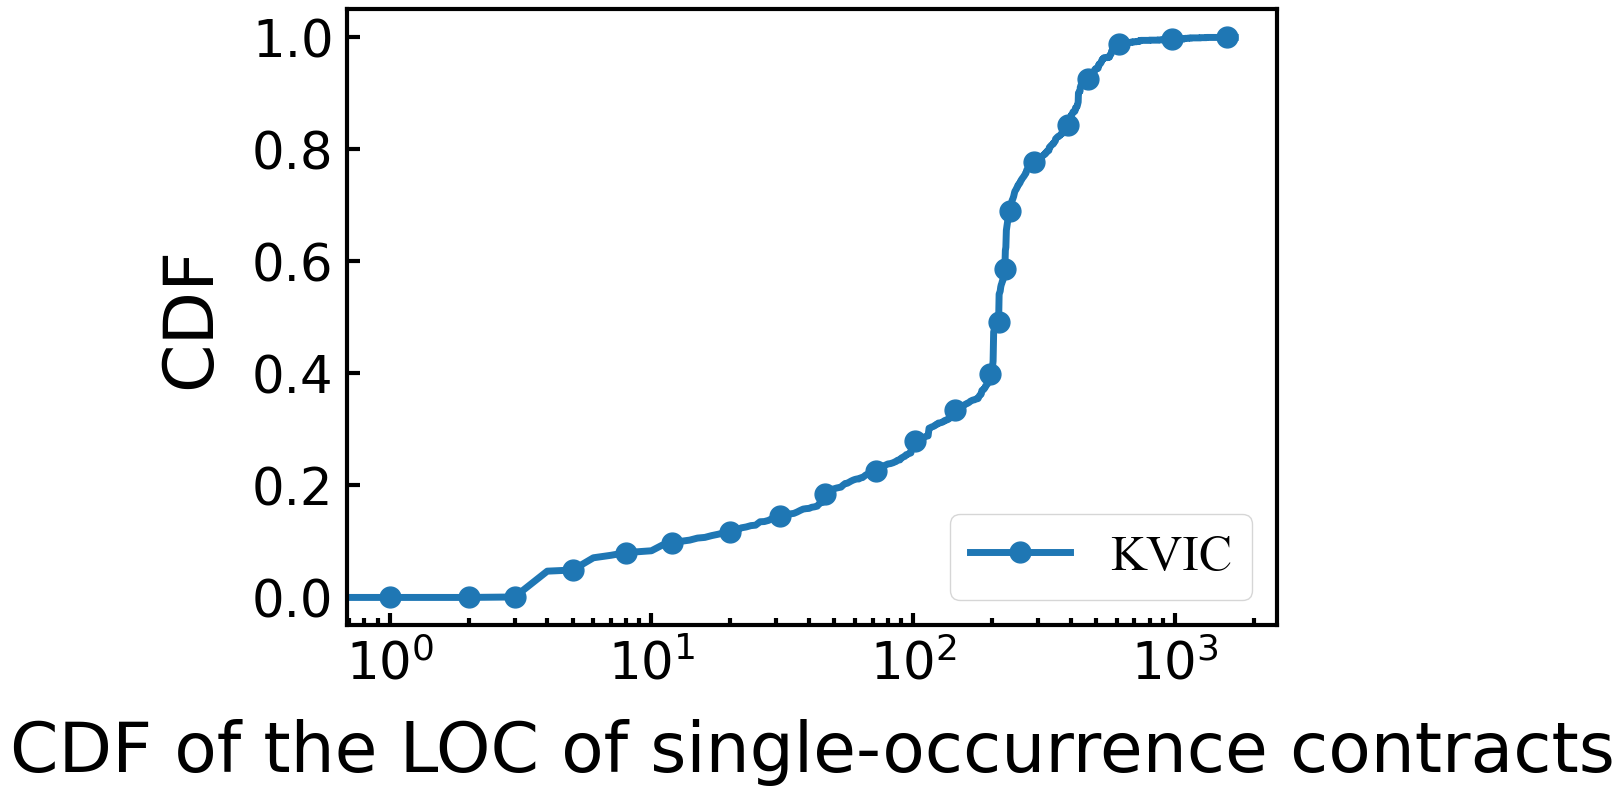

In [41]:
#     n = len([i for i in sorted(list(d.items()), key = lambda x: -x[1]) if i[1]==1])
#sorted(contract_names, key = lambda x:-x[2])

#contract_names = contract_names_copy

print('note: only counting single-occurence contracts')
max_lines = max([i[2] for i in contract_names_single])
xs = []
ys = []
for num_lines in range(0, max_lines):
    contract_names = [i[1] for i in contract_names_single if i[2] >= num_lines]
    n = len(contract_names)
    xs.append(num_lines)
    ys.append((len(contract_names_single) - n)/len(contract_names_single))
make_plot_cdf(xs, ys, 'CDF of the LOC of single-occurrence contracts', 'cdf_loc_single_occurrence_contracts')

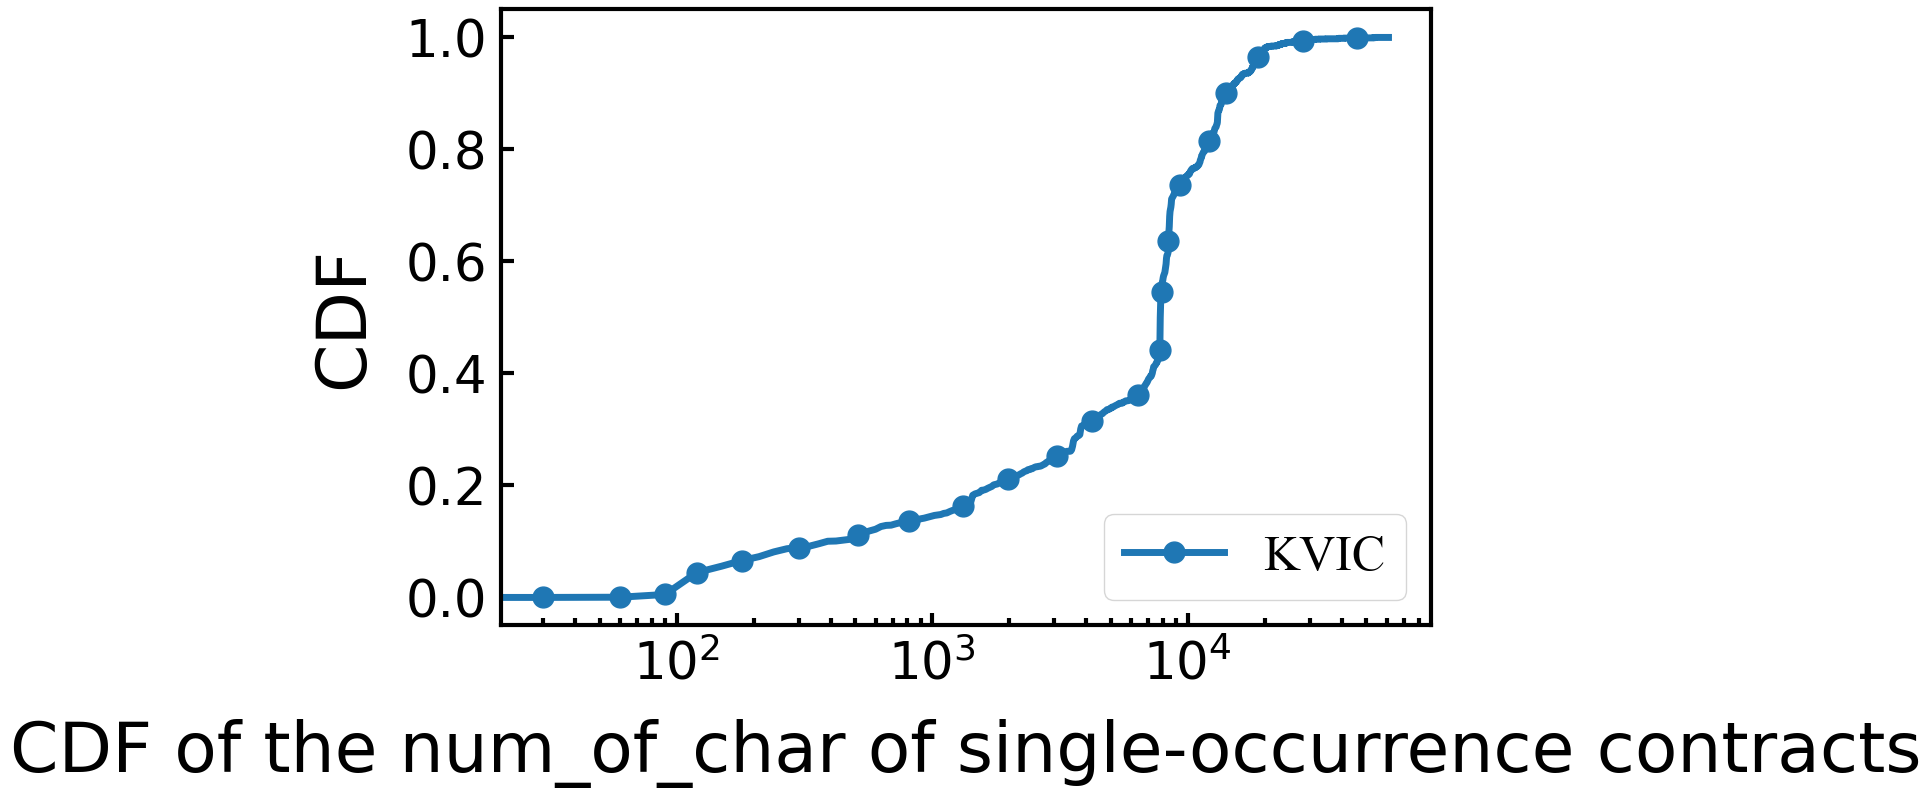

In [45]:
max_chars = max([i[3] for i in contract_names_single])
xs = []
ys = []
for num_chars in range(0, max_chars, 30):
    contract_names = [i[1] for i in contract_names_single if i[3] >= num_chars]
    n = len(contract_names)
    xs.append(num_chars)
    ys.append((len(contract_names_single) - n)/len(contract_names_single))

    
make_plot_cdf(xs, ys, 'CDF of the num_of_char of single-occurrence contracts', 'cdf_nun_of_char_single_occurrence_contracts')


In [43]:
max_chars

60978

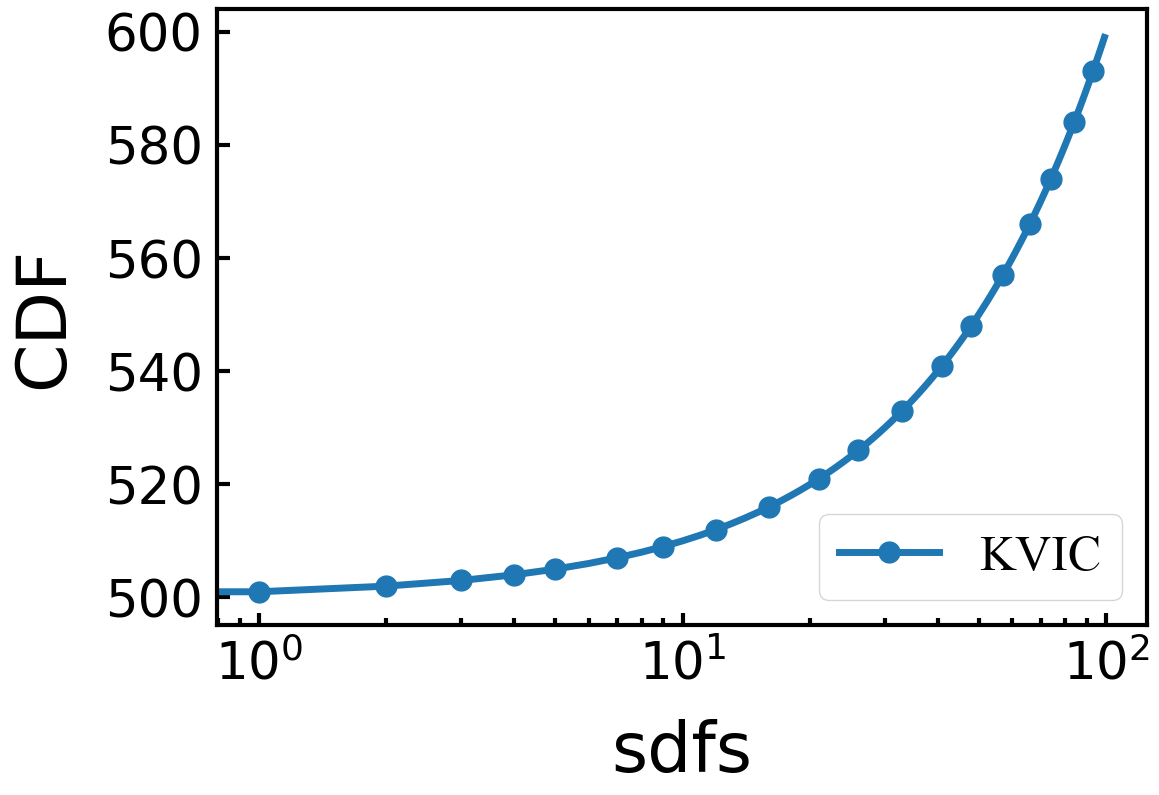

In [28]:
x = list(range(100))
y = list(range(500,600))




In [63]:
duplicate_functions_to_counts = dict()
func_name_to_obj = dict()

for c in contract_names_single:
    c = c[0]
    f_lst = c.function_lst
    
    for f in f_lst:
        f_name = f.get_sig_code_lines()[0].split('function ')[1].split('(')[0].strip()
        if f_name in duplicate_functions_to_counts:
            duplicate_functions_to_counts[f_name] += 1
            continue
        if f_name in func_name_to_obj:
            func_name_to_obj.pop(f_name)
            duplicate_functions_to_counts[f_name] = 2
            continue
        # not seen yet, all new
        func_name_to_obj[f_name] = f
        
        

In [64]:
print("number of single-occurrence functinos", len(func_name_to_obj))
print("number of multi-occurrence functinos", len(duplicate_functions_to_counts))
print('top repeated function names:')
sorted(list(duplicate_functions_to_counts.items()), key = lambda x:-x[1])

number of single-occurrence functinos 4504
number of multi-occurrence functinos 1461
top repeated function names:


[('_transfer', 1741),
 ('transferFrom', 1541),
 ('approve', 1525),
 ('transfer', 1515),
 ('decimals', 1481),
 ('balanceOf', 1449),
 ('totalSupply', 1432),
 ('allowance', 1428),
 ('name', 1403),
 ('symbol', 1400),
 ('_approve', 1353),
 ('swapTokensForEth', 1266),
 ('removeLimits', 1077),
 ('sendETHToFee', 957),
 ('openTrading', 897),
 ('min', 799),
 ('manualSwap', 618),
 ('isBot', 446),
 ('isContract', 398),
 ('addLiquidity', 347),
 ('swapBack', 341),
 ('excludeFromFees', 303),
 ('_setAutomatedMarketMakerPair', 271),
 ('excludeFromMaxTransaction', 253),
 ('addBots', 252),
 ('setAutomatedMarketMakerPair', 246),
 ('delBots', 242),
 ('isExcludedFromFees', 240),
 ('increaseAllowance', 228),
 ('decreaseAllowance', 228),
 ('enableTrading', 217),
 ('_getValues', 202),
 ('manualsend', 200),
 ('tokenFromReflection', 199),
 ('_getRate', 196),
 ('_getCurrentSupply', 196),
 ('_getTValues', 196),
 ('_getRValues', 194),
 ('_tokenTransfer', 190),
 ('manualswap', 187),
 ('updateSwapTokensAtAmount', 185

In [66]:
# now sort by length
func_name_to_length = dict()


for f_name in func_name_to_obj:
    f = func_name_to_obj[f_name]
    try:
        str_codes = lines_to_str(f.get_body_code_lines())
    except TypeError:
        continue
    func_name_to_length[f_name] = len(str_codes)
    
long_enough_functions = [i for i in sorted(list(func_name_to_length.items()), key = lambda x: -x[1]) if i[1]>=1000]

print('number of single-occurrence functions with >= 900 chars: ', len(long_enough_functions))

number of single-occurrence functions with >= 900 chars:  335


In [67]:
num_chars = 5000
long_enough_names = [i for i in contract_names_single if i[3] >= num_chars]

In [68]:
len(long_enough_names)

1876

In [69]:
print('out of this many long enough single-occurrence contracts: ', len(long_enough_names))
count = 0 
for cur_select_ind in range(len(long_enough_names)):
    cur_select_contract = long_enough_names[cur_select_ind][0]

    contains_complex_functions = any([func_name_to_obj[f[0]] in cur_select_contract.function_lst for f in long_enough_functions])
    if not contains_complex_functions:
        continue
    else:
        count += 1

    
print('there are this many contracts that contain long enough functions: ', count)




out of this many long enough single-occurrence contracts:  1876
there are this many contracts that contain long enough functions:  142


In [70]:
len(contract_names_copy)

7530

In [104]:
l = []
for c in contract_names_copy[:500]:
    new_l = [i for i in c[0].get_code_lines() if len([j for j in i.split(' ') if j.isupper() and 'ERC20' not in j]) > 0]
    if len(new_l) >= 4:
        l.append(new_l)
            
            
            

In [96]:
for c in contract_names_copy[:]:
    if '    uint256 public constant MAX_ID = 8888;' in c[0].get_code_lines():
        print(c)
        break

    
    

(<contract_breakdown_utils.Contract object at 0x176885df0>, 'PumpNft', 366, 10945)


In [105]:
l

[['    Implementation public immutable IMPL;',
  '    // Made `payable` to allow initialized crowdfunds to receive ETH as an',
  '        IMPL = impl;',
  '        Implementation impl = IMPL;'],
 ['contract TIGGER is ERC20, Ownable {',
  '    constructor() ERC20("Tigger", "TIGR") {',
  '            and CANNOT be called ever again',
  '            0, // accept any amount of ETH'],
 ['    address public immutable DEV;',
  '        require(msg.sender == DEV, "admin: wut do you try?");',
  '        DEV = administrator = payable(msg.sender);',
  '        TransferHelper.safeTransfer(token, DEV, amount);',
  '        TransferHelper.safeTransfer(token, DEV, IERC20(token).balanceOf(address(this)));'],
 ['contract XD is Context, Ownable, IERC20 {',
  '    string constant private _symbol = "XD";',
  '    address constant public DEAD = 0x000000000000000000000000000000000000dEaD;',
  '            && !liquidityAdd[ins]  && !liquidityAdd[out] && out != DEAD && out != address(0) && out != address(this

In [ ]:
['contract POND2 is Context, IERC20, Ownable {',
  '    string private constant _name = "POND2.0";',
  '    string private constant _symbol = "POND2.0";',
  '    uint256 private constant MAX = ~uint256(0);',
  '    uint256 private _rTotal = (MAX - (MAX % _tTotal));',
  '                require(from == owner(), "TOKEN: This account cannot send tokens until trading is enabled");',
  '            require(amount <= _maxTxAmount, "TOKEN: Max Transaction Limit");',
  '            require(!bots[from] && !bots[to], "TOKEN: Your account is blacklisted!");',
  '                require(balanceOf(to) + amount < _maxWalletSize, "TOKEN: Balance exceeds wallet size!");'],

In [ ]:
['contract PaoGen is RevokableDefaultOperatorFilterer, ERC2981 ,Ownable, ERC721RestrictApprove ,AccessControl,ReentrancyGuard {',
  '    ) ERC721Psi("PaoGene", "PG") {',
  '        //CAL initialization',
  '        require(0 < _mintAmount, "need to mint at least 1 NFT");',
  '        require( (_nextTokenId() -1) + _mintAmount <= maxSupply , "max NFT limit exceeded");',
  '            require(_mintAmount <= maxMintAmountPerAddress - userMintedAmount[saleId][msg.sender] , "max NFT per address exceeded");',
  '    bytes32 public constant AIRDROP_ROLE = keccak256("AIRDROP_ROLE");',
  '        require(0 < _mintAmount , "need to mint at least 1 NFT");',
  '        require( (_nextTokenId() -1) + _mintAmount <= maxSupply , "max NFT limit exceeded");        ',
  '    //URI section',
  '    //token URI',
  '    bytes32 public constant MINTER_ROLE  = keccak256("MINTER_ROLE");',
  '    bytes32 public constant BURNER_ROLE  = keccak256("BURNER_ROLE");',
  '        require( (_nextTokenId() -1) + _amount <= maxSupply , "max NFT limit exceeded");',
  '    bytes32 public constant ADMIN = keccak256("ADMIN");',
  '                    OVERRIDES ERC721RestrictApprove',
  '                    OVERRIDES ERC721RestrictApprove'],

In [ ]:
['    mapping(bytes32 => FeeStruct) private FEES; // map keccak(fee_name) to fee struct e.g. keccak256("DEFAULT") => FeeStruct',
  '    EnumerableSet.Bytes32Set private FEE_LOOKUP; // contains keccak(feeName)',
  '    IFeeResolver public FEE_RESOLVER; // Resolve R fees',
  '    address public AUTO_COLLECT_ACCOUNT; // account controlled by UNCX to auto collect fees if a fee option involving collection fees was accepted',
  '    address payable public FEE_ADDR_LP; // LP fee destination',
  '    address payable public FEE_ADDR_COLLECT; // collect fee destination',
  '    uint256 public constant FEE_DENOMINATOR = 10000; // denominator for all fees',
  '    ICountryList public COUNTRY_LIST;',
  '    IMigrateV3NFT public MIGRATOR; // migrate to future amm versions while liquidity remains locked',
  '    address public MIGRATE_IN; // address of the migration in contract',
  '    uint256 public NONCE = 0; // incremental lock nonce counter, this is the unique ID for the next lock',
  '    // If a locks unlock date is set to ETERNAL_LOCK the lock is eternal and not ever withdrawable.',
  "    // It can however be migrated by the owner to future AMMS and is therefore preferrable to burning liquidity, or sending liquidity NFT's to the dead address.",
  '    uint256 public ETERNAL_LOCK = type(uint256).max;',
  '    mapping(uint256 => Lock) public LOCKS;',
  '    mapping(address => EnumerableSet.UintSet) USER_LOCKS; // a set of all lock_ids owned by a user, useful for on chain enumeration.',
  '        COUNTRY_LIST = _countryList;',
  '        AUTO_COLLECT_ACCOUNT = _autoCollectAddress;',
  '        FEE_ADDR_LP = _lpFeeReceiver;',
  '        FEE_ADDR_COLLECT = _collectFeeReceiver;',
  '        FEE_RESOLVER = _resolver;',
  '        AUTO_COLLECT_ACCOUNT = _autoCollectAccount;',
  '        FEE_ADDR_LP = _lpFeeReceiver;',
  '        FEE_ADDR_COLLECT = _collectFeeReceiver;',
  '        require(nameHash != keccak256(abi.encodePacked("DEFAULT")), "DEFAULT");',
  '        require(FEE_LOOKUP.contains(feeHash), "NOT FOUND");',
  "            require(msg.value == fee.flatFee, 'FLAT FEE');",
  '            TransferHelper.safeTransferFrom(fee.flatFeeToken, msg.sender, FEE_ADDR_LP, fee.flatFee);',
  "        require(params.collectAddress != address(0), 'COLLECT_ADDR');",
  "        require(params.unlockDate < 1e10 || params.unlockDate == ETERNAL_LOCK, 'MILLISECONDS'); // prevents errors when timestamp entered in milliseconds",
  "        require(params.unlockDate > block.timestamp, 'DATE PASSED');",
  "        require(COUNTRY_LIST.countryIsValid(params.countryCode), 'COUNTRY');",
  '        if (msg.sender == MIGRATE_IN) {',
  '            // convert the position to full range by minting a new full range NFT',
  '            params.nftPositionManager.decreaseLiquidity(INonfungiblePositionManager.DecreaseLiquidityParams(nftId, uint128(liquidity * fee.lpFee / FEE_DENOMINATOR), 0, 0, block.timestamp));',
  '            params.nftPositionManager.collect(INonfungiblePositionManager.CollectParams(nftId, FEE_ADDR_LP, type(uint128).max, type(uint128).max));',
  '        newLock.lock_id = NONCE;',
  '        LOCKS[NONCE] = newLock;',
  '        NONCE++;',
  '        bool collectorIsBot = AUTO_COLLECT_ACCOUNT == msg.sender;',
  '        require(userLock.owner == msg.sender || userLock.additionalCollector == msg.sender || collectorIsBot, "OWNER");',
  '            address feeTo = collectorIsBot ? _recipient : FEE_ADDR_COLLECT;',
  '                fee0 = balance0 * userLock.ucf / FEE_DENOMINATOR;',
  '                fee1 = balance1 * userLock.ucf / FEE_DENOMINATOR;',
  '    * This method is here just for convenience for some contracts which solely interact with the UNCX lockers / lockIds',
  '        require(userLock.nft_id == params.tokenId, "NFT ID");',
  "        emit onIncreaseLiquidity(_lockId); // This can be called directly from the NFT position manager in which case this event won't fire",
  "        require(userLock.nft_id == params.tokenId, 'NFT ID');",
  '        if (userLock.unlockDate == ETERNAL_LOCK) {',
  "            require(userLock.unlockDate < block.timestamp, 'NOT YET');",
  "        require(_unlockDate > userLock.unlockDate, 'DATE');",
  "        require(_unlockDate > block.timestamp, 'DATE PASSED');",
  "        require(_unlockDate < 1e10 || _unlockDate == ETERNAL_LOCK, 'MILLISECONDS'); // prevents errors when timestamp entered in milliseconds",
  '    * @dev withdraw a UniV3 liquidity NFT and send it to _receiver',
  '        if (userLock.unlockDate == ETERNAL_LOCK) {',
  "            require(userLock.unlockDate < block.timestamp, 'NOT YET');",
  '        MIGRATE_IN = _migrateIn;',
  '    * @dev migrate a lock to a new amm version (Uniswap V4)',
  '        require(address(MIGRATOR) != address(0), "NOT SET");',
  "        require(_collectAddress != address(0), 'COLLECT_ADDR');",
  '        require(msg.sender != _newOwner, "SAME OWNER");',
  '        require(userLock.pendingOwner == msg.sender, "OWNER");',
  "    * @dev set the migrator contract which allows locked LP NFT's to be migrated to future AMM versions",
  '        MIGRATOR = IMigrateV3NFT(_migrator);',
  '        require(_ucf < l.ucf, "L");',
  '        require(userLock.owner == msg.sender, "OWNER");',
  '        return NONCE;',
  '    * Since this contract is only for locking NFT liquidity, this allows removal of ERC20 tokens and cannot remove locked NFT liquidity.',
  "        // Attempting to transfer nfts with this function (substituting a nft_id for _amount) wil fail with 'ST' as NFTS do not have the same interface"],

In [94]:
for i in l:
    if any([' constant ' in j for j in i]):
        for m in i:
            print(m)
        print('\n\n')

    uint256 public constant totalSupply = 1_000_000 * 10**decimals;



    uint256 public constant FEE_DENOMINATOR = 10000; // denominator for all fees
    uint256 public NONCE = 0; // incremental lock nonce counter, this is the unique ID for the next lock
    uint256 public ETERNAL_LOCK = type(uint256).max;



    uint256 public constant totalSupplyOnStart = 1e18;



    uint256 public maxTransactionAmount;
    uint256 public swapTokensAtAmount;
    uint256 public maxWallet;
    uint256 public percentForLPBurn = 25; // 25 = .25%
    uint256 public lpBurnFrequency = 3600 seconds;
    uint256 public lastLpBurnTime;
    uint256 public manualBurnFrequency = 30 minutes;
    uint256 public lastManualLpBurnTime;
    uint256 public buyTotalFees;
    uint256 public buyMarketingFee;
    uint256 public buyLiquidityFee;
    uint256 public buyDevFee;
    uint256 public sellTotalFees;
    uint256 public sellMarketingFee;
    uint256 public sellLiquidityFee;
    uint256 public sellDevFee;
    uint25

In [107]:
dates = [i for i in os.listdir('crawled_codes/') if i.startswith('2023') and not i.endswith('_duplicates')]
total_num = 0
for date in dates:
    file_names = os.listdir('crawled_codes/' + date)
    total_num += len(file_names)
print('total num of crawled code files: ', total_num)


failed_111 = []
contract_names = []
for date in dates:
    file_names = os.listdir('crawled_codes/' + date)
    for f in file_names:
#         if f in ['0xf03d6c901ad36e6dae14a1bfd36db1d730914c77.txt', '0xbf7f4cdf6084d57e3bddc2afa2308be72b0ea087.txt']:
#             continue
        #print(f)
        f = 'crawled_codes/' + date + '/' + f
        try:
            c_f = Code_File(f, '0x' + f.split('.txt')[0].split('0x')[1])
        except:
            failed_111.append(f)
        for c in c_f.contract_lst:
            contract_names.append((c, c.get_contract_name(), len(c.get_code_lines()), len(lines_to_str(c.get_code_lines()))))
            if '    mapping(bytes32 => FeeStruct) private FEES; // map keccak(fee_name) to fee struct e.g. keccak256("DEFAULT") => FeeStruct' in c.get_code_lines():
                print(1)
            if c.get_contract_name() == 'UNCX_ProofOfReservesV2_UniV3':
                print(f)
t = 0
for date in dates:
    file_names = os.listdir('crawled_codes/' + date)
    for f in file_names:
        t += 1 
print('failed to parse: ', len(failed_111), ' files')
print('in total: ', t, ' files')
print('ratio: ', len(failed_111)/t * 100, ' %')

contract_names_copy = contract_names


total num of crawled code files:  6143
1
crawled_codes/2023-08-06/0x7f5C649856F900d15C83741f45AE46f5C6858234.txt
failed to parse:  141  files
in total:  6143  files
ratio:  2.2952954582451572  %
